# **KUIS 2**

Nama : **Iftitah Hidayati**

Kelas : TI 3H

NIM : 2041720006

No. Presensi : 11

# **Soal**
1. Buat 5 jenis visualisasi yang dapat dihasilkan dari dataset yang diberikan! (5 poin)
2. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (5 poin)
3. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (30 poin)
4. Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada tahun tertentu sebagai x dan jumlah  luaran sebagai y) serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (30 poin)
5. Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4! (20 poin)
6. Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal satu visualisasi)! (10 poin)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Load data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Data/PembelajaranMesin/P13-kuis2/dataset_quis.csv')

df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [ ]:
df["id_ketua"].fillna(0, inplace=True)
df["id_anggota1"].fillna(0, inplace=True)
df["id_anggota2"].fillna(0, inplace=True)
df["id_anggota3"].fillna(0, inplace=True)
df["id_anggota4"].fillna(0, inplace=True)
df["id_anggota5"].fillna(0, inplace=True)

df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [ ]:
# Encoding
# Fungsi encoding yang akan digunakan adalah LabelEncoder
# Hal ini karena kita hanya mengganti nilai variabel dari nama berupa string menjadi angka. Sama halnya dengan label

from sklearn.preprocessing import LabelEncoder

# Inisiasi label encoder
encode = LabelEncoder()

# Terpakan label encoder
df['keterlibatan_vltr'] = encode.fit_transform(df['keterlibatan_vltr'])
df['skema'] = encode.fit_transform(df['skema'])
df['luaran_hki'] = encode.fit_transform(df['luaran_hki'])
df['jenis_luaran_hki'] = encode.fit_transform(df['jenis_luaran_hki'])
df['potensi_hki'] = encode.fit_transform(df['potensi_hki'])
df['luaran_lain'] = encode.fit_transform(df['luaran_lain'])
df['luaran_hki'] = encode.fit_transform(df['luaran_hki'])
df['jenis_luaran_lain'] = encode.fit_transform(df['jenis_luaran_lain'])
df['status_luaran_lain'] = encode.fit_transform(df['status_luaran_lain'])

df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain,luaran_hki\t
0,7206.0,7214.0,6211.0,8602.0,7801.0,0.0,0,0,2019,1,1,1,2,0,3,1,1
1,7214.0,7109.0,8402.0,7903.0,9202.0,0.0,0,0,2019,1,1,1,2,0,3,1,1
2,5911.0,8201.0,8701.0,9101.0,9003.0,0.0,0,0,2019,1,1,1,2,0,3,1,1
3,8402.0,7702.0,8602.0,8903.0,8903.0,0.0,0,0,2019,1,1,1,2,0,3,1,1
4,8201.0,8305.0,5911.0,5903.0,8402.0,0.0,0,0,2019,1,1,1,2,0,3,1,1


## **Soal 1**
1. Buat 5 jenis visualisasi yang dapat dihasilkan dari dataset yang diberikan!

      **Jawaban :**

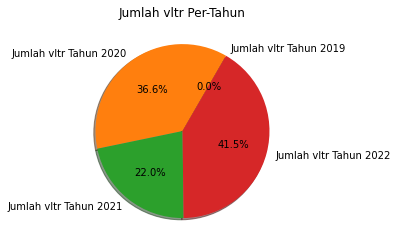

In [ ]:
# =================================================================================
# Membuat visualisasi menggunakan pie chart
# =================================================================================
import matplotlib.pyplot as plt
thn19 = df[df ['tahun'] == 2019 ]['jml_vltr_terlibat']
thn20 = df[df ['tahun'] == 2020 ]['jml_vltr_terlibat']
thn21 = df[df ['tahun'] == 2021 ]['jml_vltr_terlibat']
thn22 = df[df ['tahun'] == 2022 ]['jml_vltr_terlibat']
#Distribusi tagihan di tiap-tiap region
Distribusi = [np.count_nonzero(thn19), np.count_nonzero(thn20), np.count_nonzero(thn21), np.count_nonzero(thn22)]
label = ['Jumlah vltr Tahun 2019', 'Jumlah vltr Tahun 2020', 'Jumlah vltr Tahun 2021', 'Jumlah vltr Tahun 2022']
plt.title('Jumlah vltr Per-Tahun')
plt.pie (Distribusi, labels = label, radius = 1, startangle=60, autopct='%.1f%%', shadow=True)
plt.show()

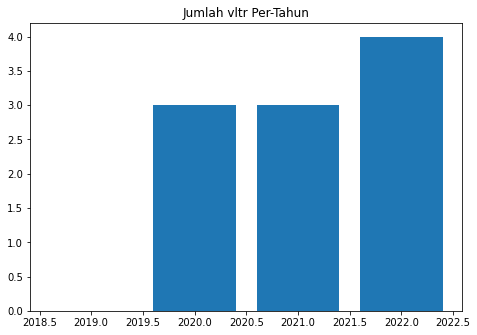

In [ ]:
# =================================================================================
# Membuat visualisasi menggunakan Bar Plot
# =================================================================================
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = 'tahun'
y = 'jml_vltr_terlibat'
plt.title('Jumlah vltr Per-Tahun')
ax.bar(x,y, data = df)
plt.show()

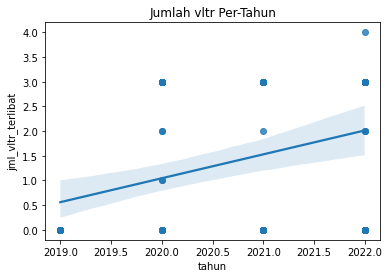

In [ ]:
# =================================================================================
# Membuat visualisasi menggunakan Reg Plot
# =================================================================================
import seaborn as sns
plt.title('Jumlah vltr Per-Tahun')
ax = sns.regplot(x = 'tahun', y = 'jml_vltr_terlibat', data = df)

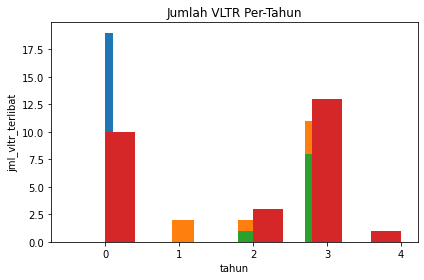

In [ ]:
# =================================================================================
# Membuat visualisasi menggunakan Histogram
# =================================================================================
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(df[df ['tahun'] == 2019 ]['jml_vltr_terlibat'])
plt.hist(df[df ['tahun'] == 2020 ]['jml_vltr_terlibat'])
plt.hist(df[df ['tahun'] == 2021 ]['jml_vltr_terlibat'])
plt.hist(df[df ['tahun'] == 2022 ]['jml_vltr_terlibat'])
plt.xlabel('tahun')
plt.ylabel('jml_vltr_terlibat')
plt.title('Jumlah VLTR Per-Tahun')
plt.tight_layout()
plt.show()

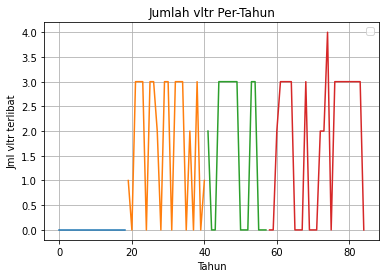

In [ ]:
# =================================================================================
# Membuat visualisasi menggunakan plot
# =================================================================================
import matplotlib.pyplot as plt
plt.plot(df[df ['tahun'] == 2019 ]['jml_vltr_terlibat'])
plt.plot(df[df ['tahun'] == 2020 ]['jml_vltr_terlibat'])
plt.plot(df[df ['tahun'] == 2021 ]['jml_vltr_terlibat'])
plt.plot(df[df ['tahun'] == 2022 ]['jml_vltr_terlibat'])

plt.xlabel('Tahun') # informasi teks untuk axis horizontal
plt.ylabel('Jml vltr terlibat') # informasi teks untuk axis vertikal
plt.title('Jumlah vltr Per-Tahun') # judul
plt.grid(True) # garis background untuk mempermudah pembacaan
plt.legend() # informasi warna garis

## **Soal 2**
2. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (5 poin)

      **Jawaban :**

In [ ]:
from sklearn.model_selection import train_test_split

y1 = df["jml_vltr_terlibat"].values
x1 = df.drop(["tahun"], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=1)

## **Soal 3**
3. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (30 poin)

      **Jawaban :**

### **Classification tree Learning**

menentukan akurasi menggunakan entropy dan gini

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate DecisionTreeClassifier 'dt' dengan kedalaman maksimum 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[3 3 2 2 1]


In [ ]:
from sklearn.metrics import accuracy_score

# Memprediksi test set labels
y_pred = dt.predict(X_test)

#  menghitung set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.88


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' sebagai kriteria informasi
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy kedalam training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [ ]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score

# menggunakan dt_entropy untuk memprediksi test set labels
y_pred = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# mengevaluasi accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print("Akurasi dicapai dengan menggunakan entropi: ", accuracy_entropy)

# Print accuracy_gini
print("Akurasi dicapai dengan menggunakan gini: ", accuracy_gini)

Akurasi dicapai dengan menggunakan entropi:  0.8823529411764706
Akurasi dicapai dengan menggunakan gini:  0.8823529411764706


### **Decision tree untuk regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

# Fit dt kedalam the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

Mengevaluasi kinerja set tes dari dt menggunakan metode Root Mean Squared Error (RMSE) metric. RMSE model mengukur rata-rata, seberapa besar prediksi model yang dihasilkan berbeda dari label yang sebenarnya. RMSE model dapat diperoleh dengan menghitung akar kuadrat dari model Mean Squared Error (MSE).

In [ ]:
from sklearn.metrics import mean_squared_error

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = mean_squared_error(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE dt: {:.2f}".format(rmse_dt))

Test set RMSE dt: 0.37


Membandingkan set tes RMSE dari dt berdasarkan pada apa yang didapat dari model regresi linier. pada jobsheet juga dibuat instance dari mode linear regression lr dan melatihnya menggunakan dataset yang sama dengan dt.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict test set labels
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** 0.5

# Print rmse_lr
print("Linear Regression test set RMSE: {:.2f}".format(rmse_lr))

# Print rmse_dt
print("Regression Tree test set RMSE: {:.2f}".format(rmse_dt))

Linear Regression test set RMSE: 0.00
Regression Tree test set RMSE: 0.37


## **Soal 4**
4. Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada tahun tertentu sebagai x dan jumlah luaran sebagai y) serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (30 poin)

      **Jawaban :**

### Metode Regresi
Metode regresi merupakan sebuah metode statistik yang melakukan prediksi menggunakan pengembangan hubungan matematis antara variabel, yaitu variabel dependen (Y) dengan variabel independen (X)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


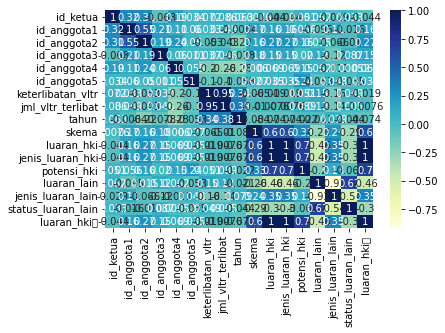

In [ ]:
sns.heatmap(df.corr().round(2), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X2 = df['tahun']
y2 = df['jml_vltr_terlibat']

In [ ]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [ ]:
# hasil training dtaset
X2_train
y2_train

# training model
import statsmodels.api as sm

X2_train_sm = sm.add_constant(X2_train)

# fitting garis regresi
lr = sm.OLS(y2_train, X2_train_sm).fit()
lr.params

const   -1040.955097
tahun       0.515777
dtype: float64

In [ ]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      jml_vltr_terlibat   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     12.66
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           0.000762
Time:                        04:17:11   Log-Likelihood:                -99.396
No. Observations:                  59   AIC:                             202.8
Df Residuals:                      57   BIC:                             206.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1040.9551    292.936     -3.554      0.001   -1627.548    -454.362
tahun          0.5158      0.145      3.558      0.001       0.225       0.806
==============================================================================
Omnibus:                       18.277   Durbin-Watson:                   2.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.818
Skew:                           0.021   Prob(JB):                        0.148
Kurtosis:                       1.754   Cond. No.                     3.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

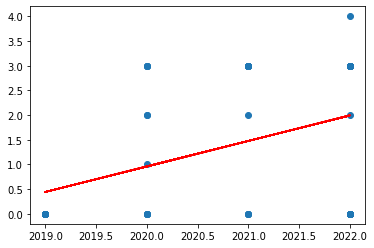

In [ ]:
# visualisasi garis regresi
plt.scatter(X2_train, y2_train)
plt.plot(X2_train, -1040.9551 + 0.5158*X2_train, 'r')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


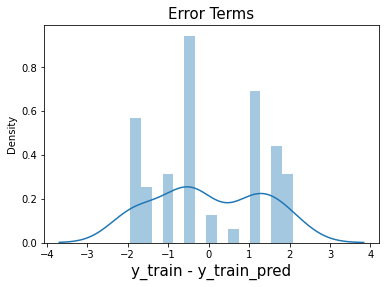

In [ ]:
# prediksi y_value dari data x yang telah dilatih
y2_train_pred = lr.predict(X2_train_sm)

res = (y2_train - y2_train_pred)

# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

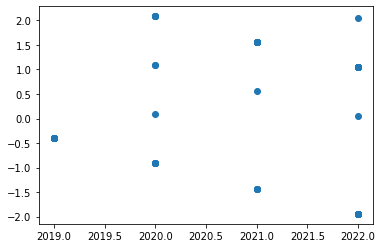

In [ ]:
plt.scatter(X2_train,res)
plt.show()

In [ ]:
# prediksi pada data uji dan evaluasi model
X2_test_sm = sm.add_constant(X2_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y2_test_pred = lr.predict(X2_test_sm)

# cetak 5 data terprediksi teratas
y2_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


73    1.945388
78    1.945388
54    1.429612
22    0.913835
80    1.945388
dtype: float64

In [ ]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r2_squared = r2_score(y2_test, y2_test_pred)
r2_squared

0.013172810294600157

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.182 sedangkan dari data testing adalah 0.013. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

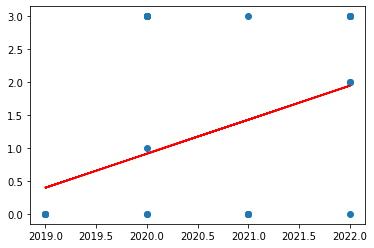

In [ ]:
# visualisasi data
plt.scatter(X2_test, y2_test)
plt.plot(X2_test, y2_test_pred, 'r')
plt.show()

## **Soal 5**
5. Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4! (20 poin)

      **Jawaban :**

### *Menggunakan Confusion Matrix*

In [ ]:
X3 = df['tahun']  
y3 = df['jml_vltr_terlibat']  
print(f"Shape dari features adalah {X3.shape}, dan shape dari target adalah {y3.shape}")

Shape dari features adalah (85,), dan shape dari target adalah (85,)


In [ ]:
# Splite Data
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=1)
y3_train[:10]

62    3
60    2
49    3
33    3
39    0
52    0
23    3
73    2
65    0
59    0
Name: jml_vltr_terlibat, dtype: int64

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear', probability=True, verbose=True)

In [ ]:
classifier.fit(X3_train.values.reshape(-1,1),y3_train)

[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

In [ ]:
y3_preds = classifier.predict(X3_test.values.reshape(-1,1))
y3_proba = classifier.predict_proba(X3_test.values.reshape(-1,1))

In [ ]:
y3_proba = y3_proba[:,1].reshape((y3_proba.shape[0],))

In [ ]:
y3_proba[:5], y3_preds[:5], y3_test[:5]

(array([0.06990271, 0.07422017, 0.06990271, 0.06990271, 0.06990271]),
 array([0, 3, 0, 0, 0]),
 38    3
 44    3
 27    2
 40    1
 36    2
 Name: jml_vltr_terlibat, dtype: int64)

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y3_test, y3_preds)
conf

array([[4, 0, 0, 7],
       [2, 0, 0, 0],
       [2, 0, 0, 0],
       [3, 0, 0, 8]])

In [ ]:
def get_confusion_matrix(y3_true, y3_pred):
    n_classes = len(np.unique(y3_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y3_true, y3_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [ ]:
conf = get_confusion_matrix(y3_test, y3_preds)
conf

array([[4, 0, 0, 7],
       [2, 0, 0, 0],
       [2, 0, 0, 0],
       [3, 0, 0, 8]])

Text(0.5, 15.0, 'Predicted label')

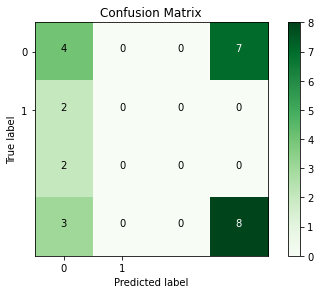

In [ ]:
import itertools
classes = [0, 1]

plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

### *Menggunakan ROC Curve*

In [ ]:
x4 = df.drop("tahun",axis=1)
y4 = df[["jml_vltr_terlibat"]]

from sklearn import preprocessing
x4 = preprocessing.normalize(x4)
y4 = preprocessing.normalize(y4)

In [ ]:
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import SGDClassifier 

from sklearn.metrics import roc_curve, auc

model = SGDClassifier(loss='hinge', class_weight='balanced')
model.fit(x4_train, y4_train)

y4_train_pred = model.decision_function(x4_train)    
y4_test_pred = model.decision_function(x4_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


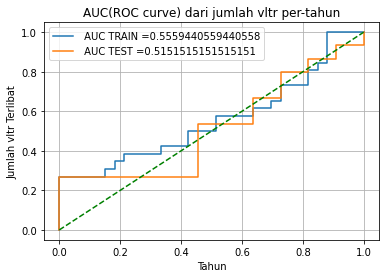

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y4_train, y4_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y4_test, y4_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("Tahun")
plt.ylabel("Jumlah vltr Terlibat")
plt.title("AUC(ROC curve) dari jumlah vltr per-tahun")
plt.show()

## **Soal 6**
6. Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal satu visualisasi)! (10 poin)

      **Jawaban :**

### ***Visualisasi Berdasarkan No 4***

### *visualisasi garis regresi*

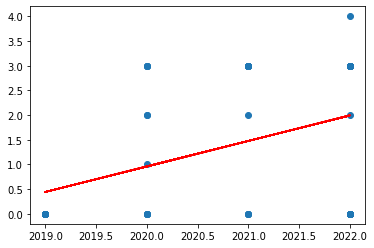

In [ ]:
# =================================================================================
# visualisasi garis regresi
# =================================================================================
plt.scatter(X2_train, y2_train)
plt.plot(X2_train, -1040.9551 + 0.5158*X2_train, 'r')
plt.show()

### *visualisasi data*

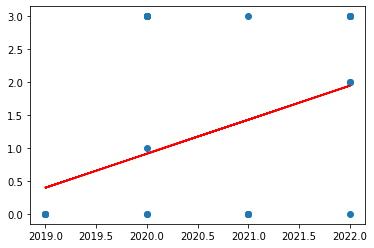

In [ ]:
# =================================================================================
# visualisasi data
# =================================================================================
plt.scatter(X2_test, y2_test)
plt.plot(X2_test, y2_test_pred, 'r')
plt.show()

### ***Visualisasi Berdasarkan No 5***

### *visualisasi confusion matrix*

Text(0.5, 15.0, 'Predicted label')

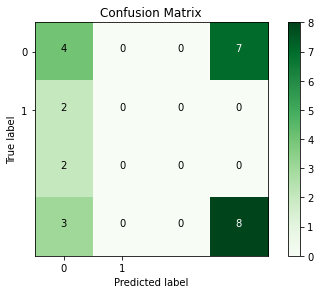

In [ ]:
# =================================================================================
# visualisasi confusion matrix
# =================================================================================
import itertools
classes = [0, 1]

plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

### *visualisasi ROUC Curve*

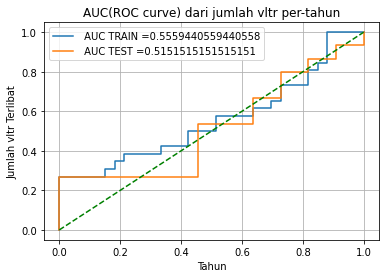

In [ ]:
# =================================================================================
# visualisasi ROUC Curve
# =================================================================================
train_fpr, train_tpr, tr_thresholds = roc_curve(y4_train, y4_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y4_test, y4_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("Tahun")
plt.ylabel("Jumlah vltr Terlibat")
plt.title("AUC(ROC curve) dari jumlah vltr per-tahun")
plt.show()